#   Techtable Project-1

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
url = 'https://raw.githubusercontent.com/SaiRithvik/Techtable-ML-Project1/master/time_series_2019-ncov-Confirmed.csv'
df = pd.read_csv(url)

In [54]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,15.415,/61.371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,12.1165,/61.679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,/18.6657,35.5296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
df_new = df.drop(['Lat','Long'],axis=1)
    

In [56]:
df_new

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
print(df_new.shape[1])

63


In [58]:
df_new.shape[0]

487

In [59]:
col = []
count = 0
for i in range(2,df_new.shape[1]):
    for j in range(df_new.shape[0]):
        if(df_new.iloc[j][i] == 0):
            count += 1
    if(count >= 0.7*df_new.shape[0]):  
        col.append(df_new.columns[i]) 
    count = 0      
col = np.array(col)
col = np.unique(col)
col                                               ### Finding the columns that need to be dropped from out DataFrame

array(['02-01-2020', '02-02-2020', '02-03-2020', '02-04-2020',
       '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020',
       '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020',
       '03-01-2020', '03-02-2020', '03-03-2020', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20',
       '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20',
       '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20',
       '2/29/20'], dtype='<U10')

In [0]:
df_new = df_new.drop(col,axis=1)

In [61]:
df_new

,Province/State,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
y = []
x3=[]
y.append(df_new[df_new.columns[-1]].values)
#for i in range(df_new.shape[0]):
df_new.dropna(axis=1)
x2 = df_new['Country/Region'].values   ### All 487 names in column of country/region

x3 = np.unique(x2)    #### x3 is a list of Unique countries = 171

In [0]:
total={}
for k in x3:
    total[k] = 0
for i in x3:
    for j in range(df_new.shape[0]):
        if (df_new.iloc[j][1] == i):
            total[f'{i}'] += df_new.iloc[j][-1]  # total is a dictionary with key as contry names and values as number of cases

In [64]:
total['US']

33272

In [0]:
m=[]
for k in total:
    m.append(total[k])    ### m has total number of positive cases of each country as a list

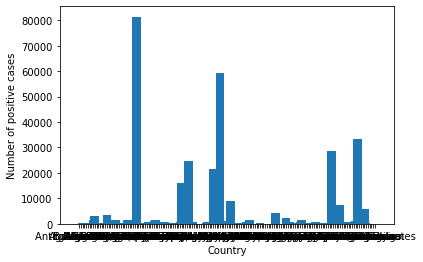

In [66]:
plt.bar(x3,m,width = 5)    ### Bar plot of total number of positive case for each country
plt.xlabel('Country')
plt.ylabel('Number of positive cases')
plt.show()

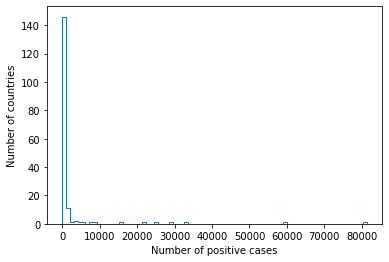

In [67]:
plt.hist(m,histtype='step',bins=80)          ### From this graph we can infer that most of the countries(146 out of 171) are having less than 5000 positive cases
plt.xlabel('Number of positive cases')
plt.ylabel('Number of countries')
plt.show()

In [0]:
m1 = [k for k in m if k > 1000]  #Number of cases of each countries with more than 1000 positive Covid-19 cases

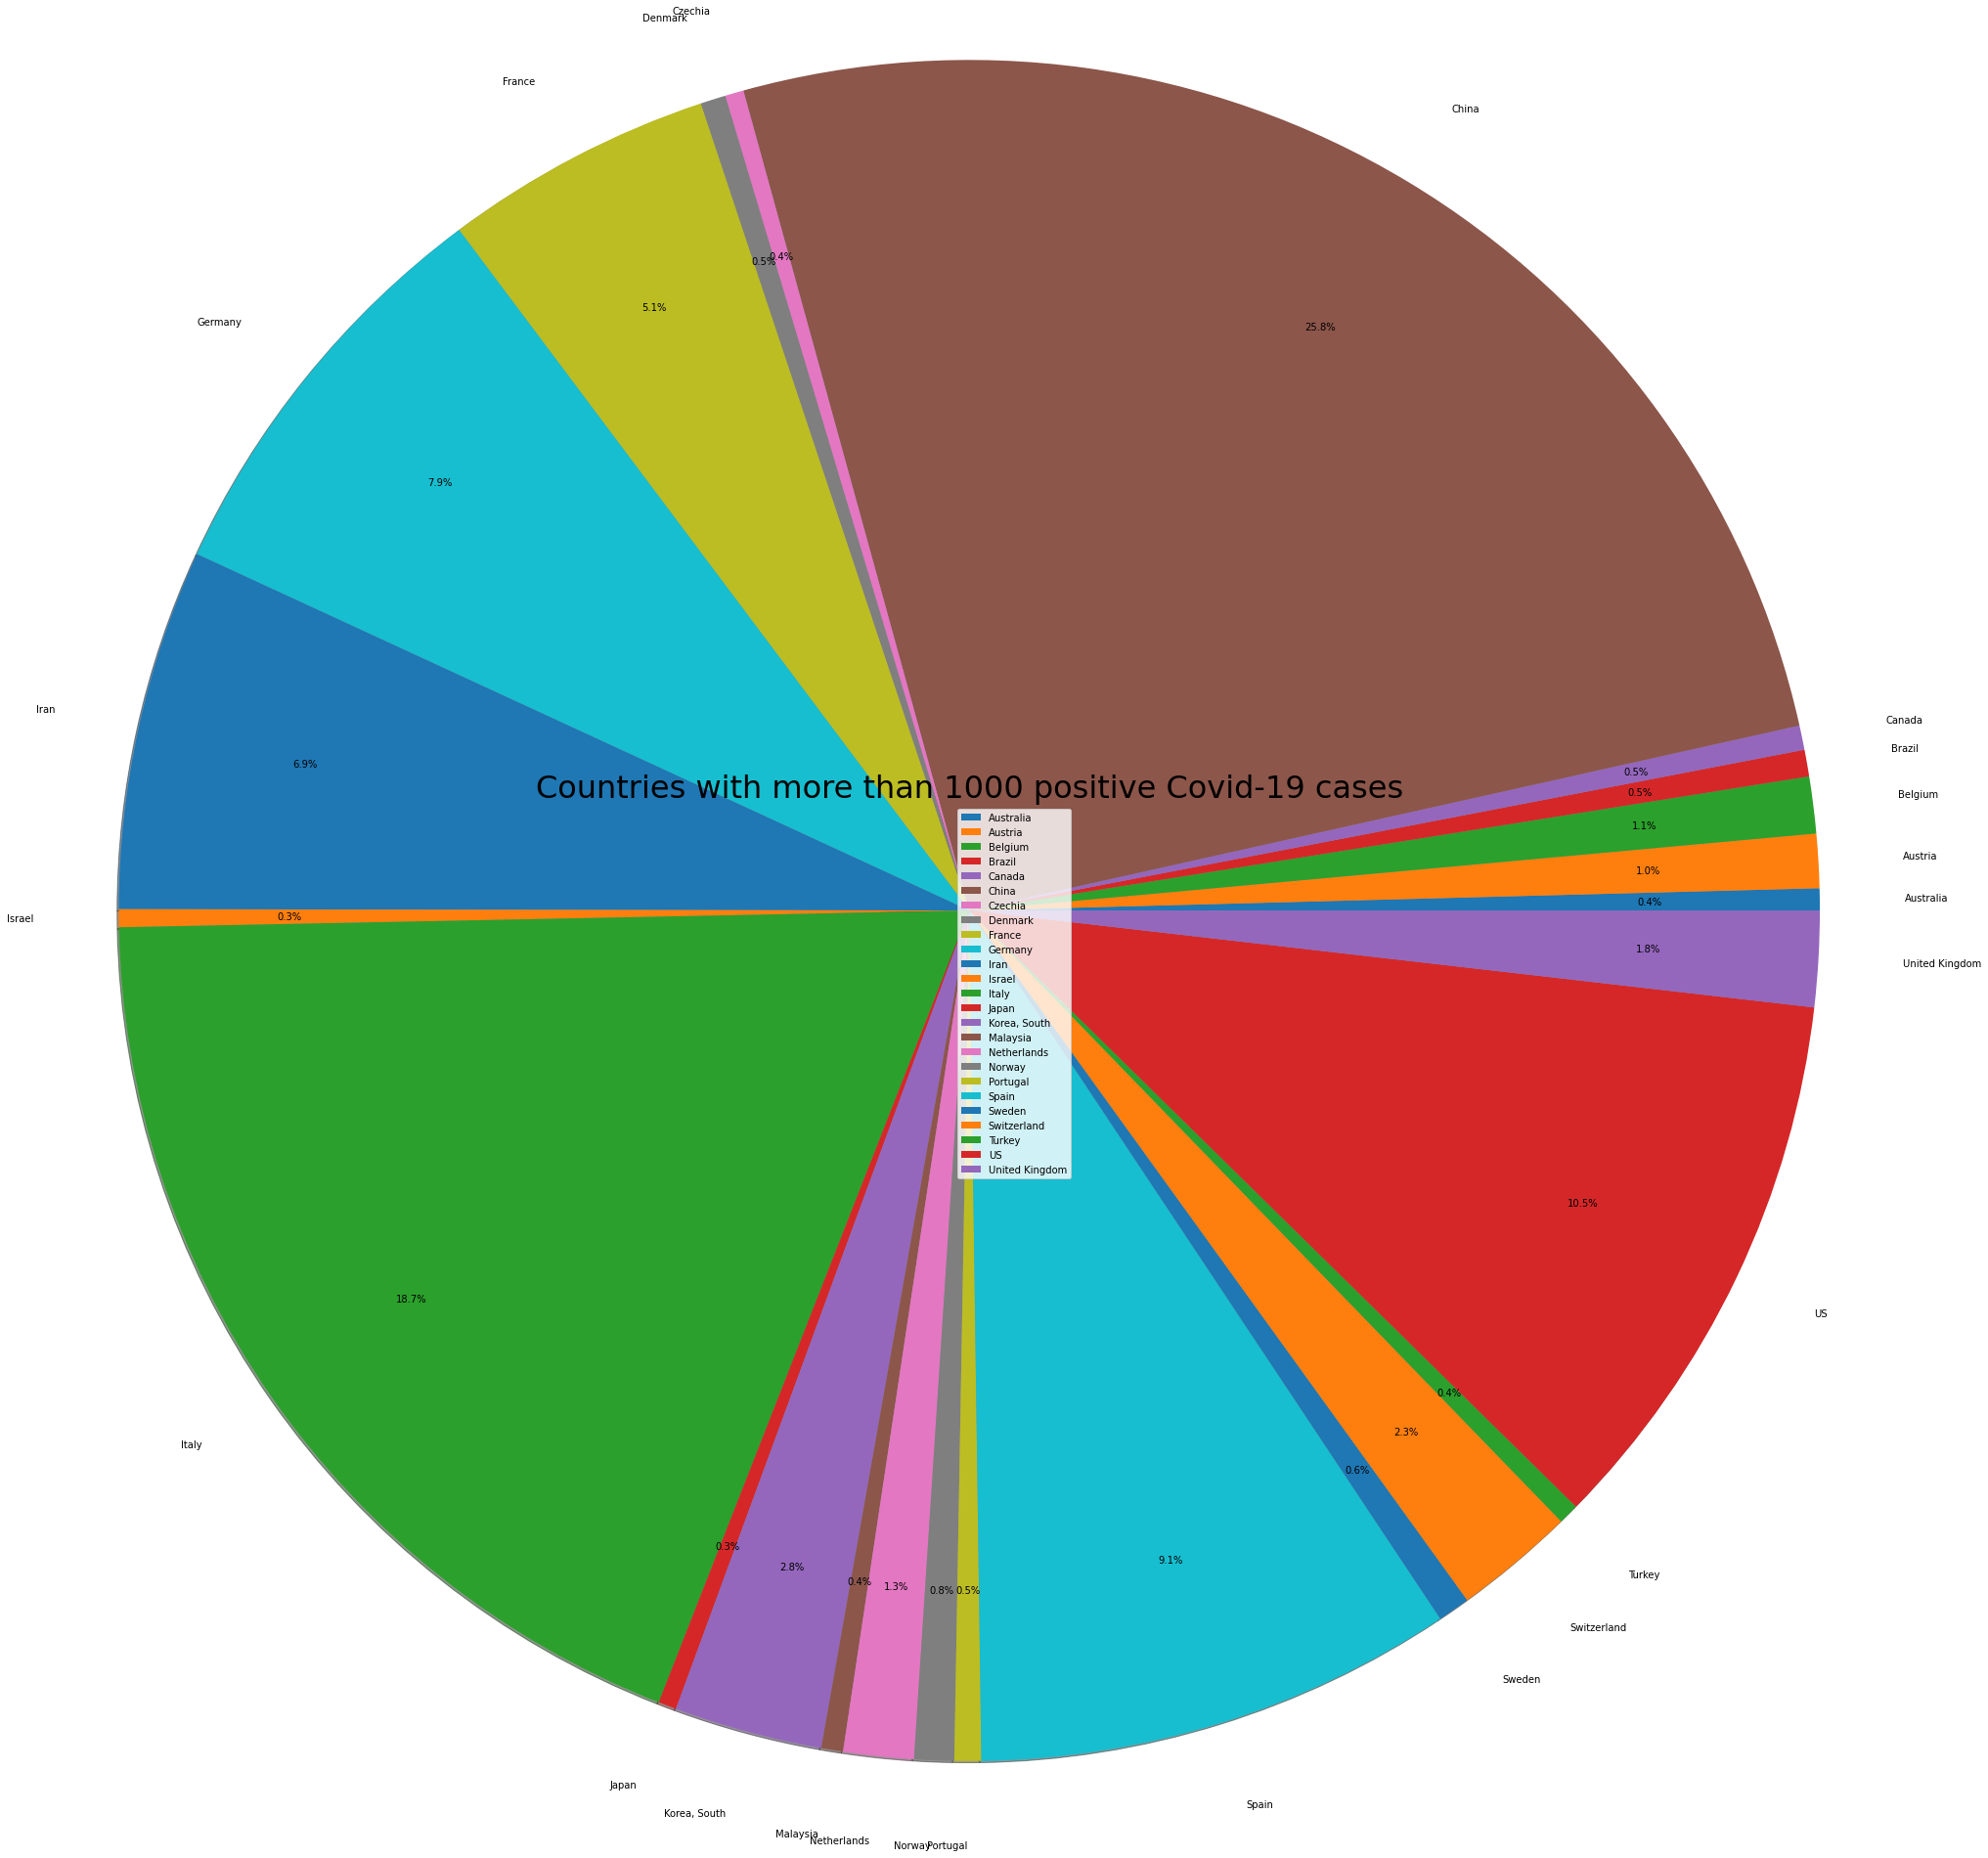

In [69]:
plt.title("Countries with more than 1000 positive Covid-19 cases",size='32')
plt.pie(m1,labels=[f'{i}' for i in total if total[i] > 1000],shadow=True,autopct='%1.1f%%',radius=10,pctdistance=0.8)   ### Countries with Covid positive cases more than 1000
plt.legend()
plt.show()

In [70]:
df_new

,Province/State,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
dates = df_new.columns[2:]

In [0]:
cases=[]
for i in range(len(dates)):
    cases.append(df_new[dates[i]].values.sum())  

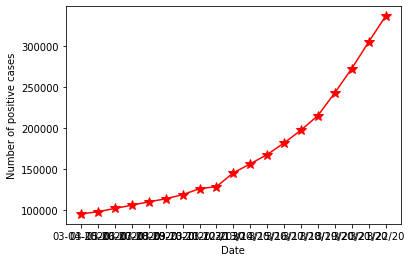

In [73]:
plt.plot(dates,cases,'r*-',markersize=10)           ### This is the date wise plot of number of total positive cases in all countries, we can see that the cases are growing exponentially
plt.xlabel('Date')
plt.ylabel('Number of positive cases')
plt.show()

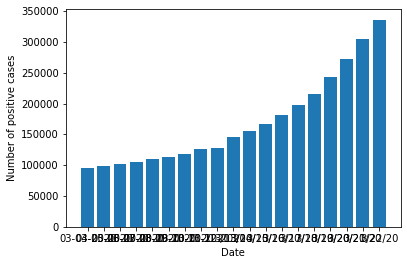

In [74]:
plt.bar(dates,cases)                      ### Date wise bar plot of total positive cases in all countries
plt.xlabel('Date')
plt.ylabel('Number of positive cases')
plt.show()

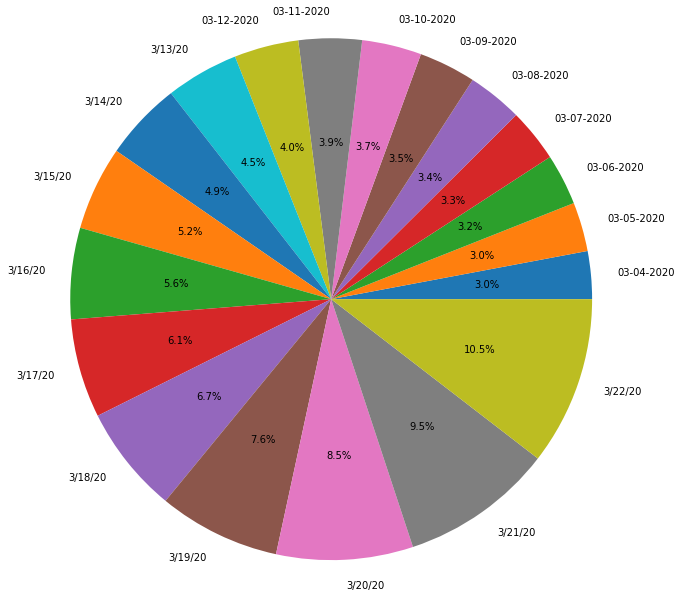

In [75]:
plt.pie(cases,labels=dates,radius= 3,autopct='%1.1f%%')
plt.show()                                                  ### Pie chart showing how much percentage each day contributed to the total number of cases finally on 3/22/20.
                                                            ### Here also we can observe the growth of number of cases with respect to each day.

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/SaiRithvik/Techtable-ML-Project1/master/c2c.csv')

In [77]:
df1

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [0]:
continents = df1['Continent'].unique()

In [0]:
a=[]
g=[]

for k in continents:
    for i in range(df1.shape[0]):
        if(df1.iloc[i][0] == k):
            a.append(df1.iloc[i][1])
    g.append(a)
    a=[]
            
                                      ### Making lists of countries in each continent

In [80]:
g   ### All countries in each continent

[['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina',
  'Burundi',
  'Cameroon',
  'CapeVerde',
  'CentralAfricanRepublic',
  'Chad',
  'Comoros',
  'Congo',
  'Congo',
  'Djibouti',
  'Egypt',
  'EquatorialGuinea',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'IvoryCoast',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Rwanda',
  'SaoTomeandPrincipe',
  'Senegal',
  'Seychelles',
  'SierraLeone',
  'Somalia',
  'SouthAfrica',
  'SouthSudan',
  'Sudan',
  'Swaziland',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Zambia',
  'Zimbabwe'],
 ['Afghanistan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Burma(Myanmar)',
  'Cambodia',
  'China',
  'EastTimor',
  'India',
  'Indonesia',
  'Iran',
  'Iraq',
  'Israel',
  'Japan',
  'Jordan',
  'Kazakhstan',
  '"Korea',
  '"Korea',
  '

In [81]:
dic={}
for i in range(len(g)):
    dic[continents[i]] = g[i]
dic    ### Dictionary of continents with their keys as their countries

{'Africa': ['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina',
  'Burundi',
  'Cameroon',
  'CapeVerde',
  'CentralAfricanRepublic',
  'Chad',
  'Comoros',
  'Congo',
  'Congo',
  'Djibouti',
  'Egypt',
  'EquatorialGuinea',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'IvoryCoast',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Rwanda',
  'SaoTomeandPrincipe',
  'Senegal',
  'Seychelles',
  'SierraLeone',
  'Somalia',
  'SouthAfrica',
  'SouthSudan',
  'Sudan',
  'Swaziland',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Zambia',
  'Zimbabwe'],
 'Asia': ['Afghanistan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Burma(Myanmar)',
  'Cambodia',
  'China',
  'EastTimor',
  'India',
  'Indonesia',
  'Iran',
  'Iraq',
  'Israel',
  'Japan',
  'Jordan',
  'Kazakhstan',
  '"Korea

In [0]:
a1 = []
continent_total=0
for k in dic:
    
    for j in range(len(dic[k])): 
        for i in total:
            if(dic[k][j] == i):
                continent_total += total[i]
                break
                
    a1.append(continent_total)
    continent_total = 0                       ### Finding total cases in each continent

In [83]:
a1  ### Total cases in each continent

[1015, 113013, 162094, 35349, 1316, 4096]

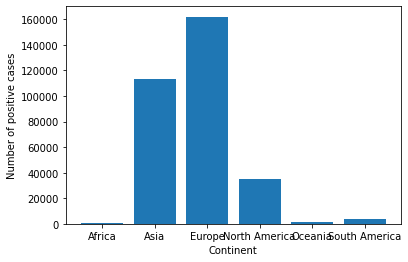

In [84]:
plt.bar(continents,a1)
plt.xlabel('Continent')
plt.ylabel('Number of positive cases')
plt.show()

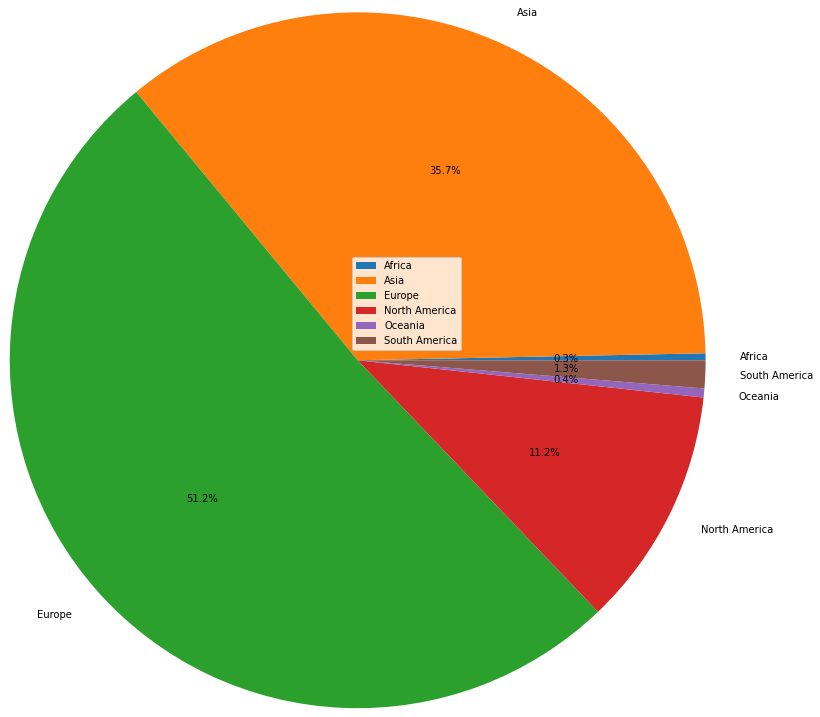

In [85]:
plt.pie(a1,labels=continents,autopct='%1.1f%%',radius=4)
plt.legend()
plt.show()